In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pickle

In [2]:
pkl_obj_statistical = pickle.load(open("./best_pm25_reg_model_statistical.pkl", "rb"))
pkl_obj_ml = pickle.load(open("./best_pm25_reg_model_ml.pkl", "rb"))

pkl_obj  = pkl_obj_statistical if (pkl_obj_statistical['score']['rmse'] < pkl_obj_ml['score']['rmse']) else pkl_obj_ml
pm25_predictions = pkl_obj['test_set_predictions']

In [3]:
pm25_to_aod_model_obj = pickle.load(open("../India/best_pm25_aod_reg_model.pkl", "rb"))
model_pkl = pm25_to_aod_model_obj
regressor = model_pkl['regressor']
scaler = model_pkl['scaler']

def model_predict(X):    
    if scaler:
        try:
            sc_X, sc_y = scaler
            y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X)))
        except Exception as e:
            poly_reg = scaler
            y_pred = regressor.predict(poly_reg.transform(X))
    else:
        y_pred = regressor.predict(X)
    return y_pred

/home/pritthijit/.mlenv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearRegression from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/pritthijit/.mlenv/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
aod_predictions = model_predict(pm25_predictions.reshape(-1,1)).reshape(-1)

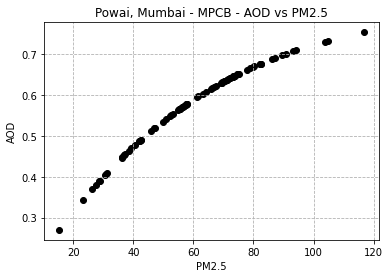

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(pm25_predictions, aod_predictions, c='k')
plt.title(f"{pkl_obj['station_name']} - AOD vs PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("AOD")
plt.grid(ls='--')

In [6]:
pickle.dump(aod_predictions, open("./aod_predictions.pkl", "wb"))